In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from utils import parse_stats, get_stat_dfs, trim_column_names, merge, REAL_POLICIES, REAL_LABELS, SIM_POLICIES_APP, SIM_LABELS_APP, MODEL_LABELS
matplotlib.rcParams.update({'font.size': 12})

In [2]:
real_path = "../../results/faro/resnet34/top9_twitter_1_1600_avgproc_min_int5m_reduced_6hr_augmented/latency_stats.pkl"
sim_path = "../../results/faro/resnet34-sim/top9_twitter_1_1600_avgproc_min_int5m_reduced_6hr_augmented/latency_stats.pkl"

In [3]:
real_df = parse_stats(real_path)
sim_df = parse_stats(sim_path)

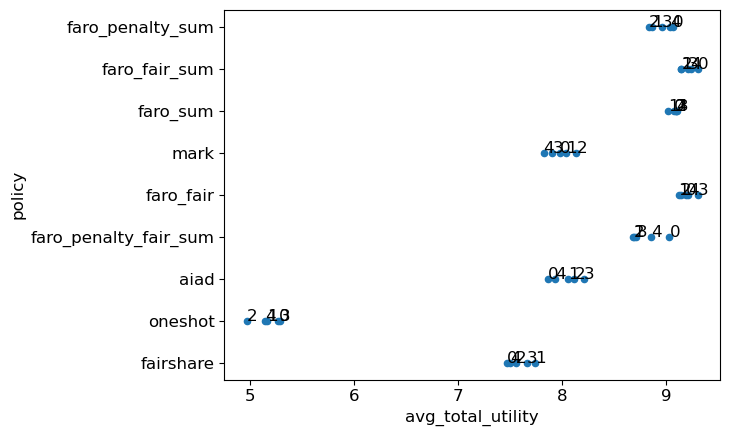

In [4]:
# visualize values for each policy
# df = real_df[real_df.num_cpus == "16"]
# df = real_df[real_df.num_cpus == "36"]
df = real_df[real_df.num_cpus == "32"]
# df = sim_df[sim_df.num_cpus == "16"]
policies = REAL_POLICIES
labels = REAL_LABELS
model_labels = MODEL_LABELS
target_df = df[
    # & (df.latency_estimator != "max_latency")
    (df.latency_estimator != "p80_latency")
    # & (df.pred_aggr != "pred_max") & (df.pred_aggr != "pred_p80")
    & (df.pred_aggr != "pred_p80") & (df.pred_aggr != "pred_avg") #& (df.pred_aggr != "pred_max")
    # & (df.pred_aggr != "pred_p80") & (df.pred_aggr != "pred_avg") & (df.pred_aggr != "pred_none")
    & (df.model_config != "model_4") & (df.model_config != "model_5") & (df.model_config != "model_6") # & (df.model_config != "model_8")
    & (df.model_config != "model_10")
    & (df.ws != "300s") & (df.ws != "480s")
    & (df.idle_timeout != "5s")
    & (~df.policy.str.endswith("utility_latency"))
    & (~df.policy.str.contains("scale"))
    & (~df.policy.str.contains("w_current"))
    & (~df.policy.str.contains("sqrt"))
    & (~df.policy.str.contains("cbrt"))
    & (~df.policy.str.contains("weighted"))
].copy()

ax = target_df.plot.scatter(x="avg_total_utility", y="policy")
for i, point in target_df.iterrows():
    ax.annotate(point["poisson"], (point["avg_total_utility"], point["policy"]))
    
# ax = target_df.plot.scatter(x="avg_total_slo_rate", y="policy")
# for i, point in target_df.iterrows():
#     ax.annotate(point["poisson"], (point["avg_total_slo_rate"], point["policy"]))

In [5]:
# num_cpus = 36
# num_cpus = 16
num_cpus = 32

# clear ws for simulation to make the same labels
sim_df.ws = ""

real_policies = REAL_POLICIES
real_labels = REAL_LABELS
sim_policies = SIM_POLICIES_APP
sim_labels = SIM_LABELS_APP
model_labels = MODEL_LABELS

real_cluster_util_df, real_cluster_slo_df, real_cluster_effective_util_df, real_avg_util_df, real_slo_rates_df, real_avg_effective_util_df = get_stat_dfs(real_df[real_df.num_cpus == str(num_cpus)], real_policies, real_labels, model_labels)
sim_cluster_util_df, sim_cluster_slo_df, sim_cluster_effective_util_df, sim_avg_util_df, sim_slo_rates_df, sim_avg_effective_util_df = get_stat_dfs(sim_df[sim_df.num_cpus == str(num_cpus)], sim_policies, sim_labels, model_labels)

cluster_utils
FairShare 5
Oneshot 5
AIAD 5
MArk/Cocktail/Barista 5
Faro-Fair 5
Faro-Sum 5
Faro-FairSum 5
Faro-PenaltySum 5
Faro-PenaltyFairSum 5
cluster_effective_utils
FairShare 5
Oneshot 5
AIAD 5
MArk/Cocktail/Barista 5
Faro-Fair 5
Faro-Sum 5
Faro-FairSum 5
Faro-PenaltySum 5
Faro-PenaltyFairSum 5
cluster_slo
FairShare 5
Oneshot 5
AIAD 5
MArk/Cocktail/Barista 5
Faro-Fair 5
Faro-Sum 5
Faro-FairSum 5
Faro-PenaltySum 5
Faro-PenaltyFairSum 5
avg_utils
FairShare 10
Oneshot 10
AIAD 10
MArk/Cocktail/Barista 10
Faro-Fair 10
Faro-Sum 10
Faro-FairSum 10
Faro-PenaltySum 10
Faro-PenaltyFairSum 10
slo_rates
FairShare 10
Oneshot 10
AIAD 10
MArk/Cocktail/Barista 10
Faro-Fair 10
Faro-Sum 10
Faro-FairSum 10
Faro-PenaltySum 10
Faro-PenaltyFairSum 10
avg_effective_utils
FairShare 10
Oneshot 10
AIAD 10
MArk/Cocktail/Barista 10
Faro-Fair 10
Faro-Sum 10
Faro-FairSum 10
Faro-PenaltySum 10
Faro-PenaltyFairSum 10
cluster_utils
FairShare 5
Oneshot 5
AIAD 5
MArk/Cocktail/Barista  model_9 5
Faro-Fair  model_9 5


In [6]:
lost_real_cluster_util_df = (10 - real_cluster_util_df)
lost_real_cluster_slo_df = (1 - real_cluster_slo_df)
if num_cpus == 16:
    targets = ["FairShare", "Oneshot", "AIAD", "MArk/Cocktail/Barista", "Faro-Sum"]
else:
    targets = ["FairShare", "Oneshot", "AIAD", "MArk/Cocktail/Barista", "Faro-FairSum"]
    # targets = ["FairShare", "Oneshot", "AIAD", "MArk/Cocktail/Barista", "Faro-Sum"]

In [7]:
dfs = [real_cluster_util_df, real_cluster_slo_df, real_cluster_effective_util_df, real_avg_util_df, real_slo_rates_df, real_avg_effective_util_df,
sim_cluster_util_df, sim_cluster_slo_df, sim_cluster_effective_util_df, sim_avg_util_df, sim_slo_rates_df, sim_avg_effective_util_df]

for df in dfs:
    trim_column_names(df)

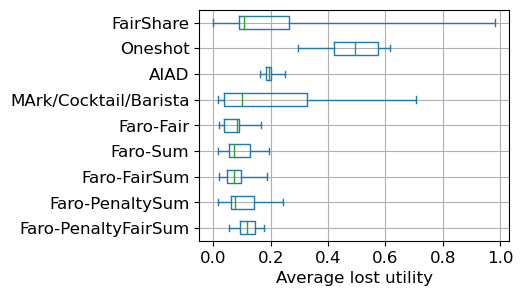

In [8]:
# boxplot_figsize = (6, 4)
boxplot_figsize = (4, 3)

ax = (1 - real_avg_util_df).plot.box(rot=0, vert=False, grid=True, whis=(0, 100), figsize=boxplot_figsize)
ax.invert_yaxis()
# if num_cpus in [32, 36] and "fairshare" not in real_policies:
    # ax.set_xlim(None, 0.85)
ax.set_xlabel("Average lost utility")
ax.get_figure().savefig(f"images/{num_cpus}_box_avg_lost_utility_real.eps", bbox_inches='tight')

In [9]:
print(real_avg_util_df["MArk/Cocktail/Barista"].min())
print(real_avg_util_df["MArk/Cocktail/Barista"].max())
print(real_avg_util_df["MArk/Cocktail/Barista"].median())

0.2941465548589691
0.9840380735790685
0.8995112685257167


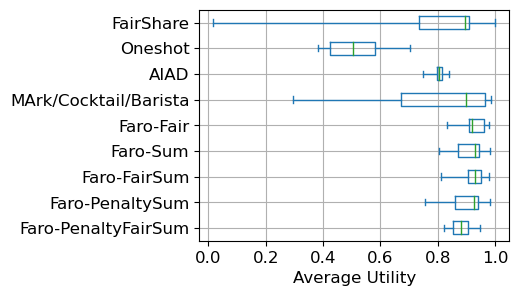

In [10]:
ax = real_avg_util_df.plot.box(rot=0, vert=False, grid=True, whis=(0, 100), figsize=boxplot_figsize)
ax.invert_yaxis()
ax.set_xlabel("Average Utility")
ax.get_figure().savefig(f"images/{num_cpus}_box_avg_utility_real.eps", bbox_inches='tight')

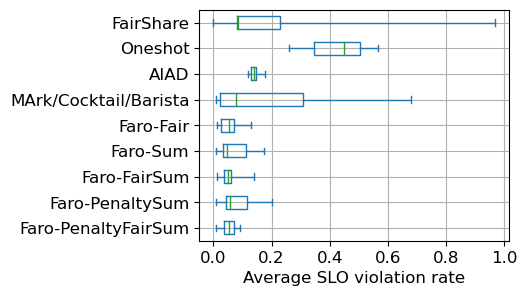

In [11]:
ax = real_slo_rates_df.plot.box(rot=0, vert=False, grid=True, whis=(0, 100), figsize=boxplot_figsize)
ax.invert_yaxis()
ax.set_xlabel("Average SLO violation rate")
ax.get_figure().savefig(f"images/{num_cpus}_box_slo_violation_real.eps", bbox_inches='tight')

In [12]:
print(real_slo_rates_df["MArk/Cocktail/Barista"].max())
print(real_slo_rates_df["MArk/Cocktail/Barista"].min())

0.678476879536285
0.009645844247259894


In [13]:
real_avg_util_df

,FairShare,Oneshot,AIAD,MArk/Cocktail/Barista,Faro-Fair,Faro-Sum,Faro-FairSum,Faro-PenaltySum,Faro-PenaltyFairSum
0,0.503650,0.571497,0.797519,0.984038,0.832472,0.949234,0.899478,0.941649,0.852577
1,0.898798,0.630787,0.832281,0.913607,0.914103,0.933433,0.931321,0.921191,0.909190
2,0.910535,0.703632,0.837539,0.621470,0.972177,0.969386,0.966633,0.948274,0.921041
3,0.890661,0.582310,0.812105,0.932331,0.921760,0.930855,0.899733,0.887430,0.861730
4,0.017543,0.401465,0.749402,0.983219,0.943437,0.805107,0.919446,0.849795,0.879817
5,0.945654,0.494166,0.804178,0.885416,0.916044,0.927577,0.929014,0.930852,0.898434
6,1.000000,0.514493,0.816717,0.974336,0.979770,0.983604,0.980348,0.981937,0.946361
7,0.711251,0.403799,0.794003,0.577960,0.857491,0.822013,0.811885,0.756481,0.822079
8,0.810746,0.384230,0.805626,0.827691,0.907146,0.856193,0.927312,0.822964,0.836504
9,0.907703,0.489342,0.799432,0.294147,0.966941,0.917847,0.958192,0.928473,0.883270


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


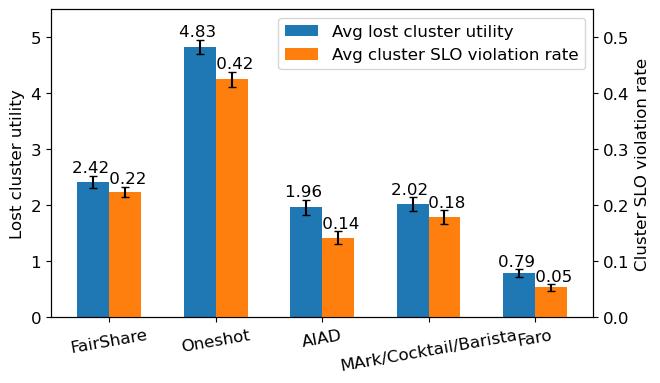

In [14]:
# figsize=(7.4, 4.8)
# figsize=(8.4, 4.8)
figsize=(7, 4)

merged_df = pd.concat([
    lost_real_cluster_util_df[targets].mean(axis=0),
    lost_real_cluster_slo_df[targets].mean(axis=0),
], axis=1).rename(columns={0: "Avg lost cluster utility", 1: "Avg cluster SLO violation rate"})
merged_std_df = pd.concat([
    lost_real_cluster_util_df[targets].std(axis=0),
    lost_real_cluster_slo_df[targets].std(axis=0),
], axis=1).rename(columns={0: "Avg lost cluster utility", 1: "Avg cluster SLO violation rate"})
ax = merged_df.plot.bar(secondary_y="Avg cluster SLO violation rate", mark_right=False, figsize=figsize, width=0.6, yerr=merged_std_df, capsize=3)

if num_cpus in [32, 36]:
    ax.set_ylim(top=5.5)
elif num_cpus == 16:
    ax.set_ylim(top=12)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_xlabel("")
ax.set_ylabel("Lost cluster utility")

new_labels = []
for text in ax.get_xticklabels():
    splits = text.get_text().split("-")
    text.set_text(splits[0])
    new_labels.append(text)
ax.set_xticklabels(new_labels, rotation=0)

right_ax = ax.right_ax
if num_cpus in [32, 36]:
    right_ax.set_ylim(top=0.55)
elif num_cpus == 16:
    right_ax.set_ylim(top=1.2)
right_ax.set_ylabel("Cluster SLO violation rate")

for bar in ax.containers:
    if isinstance(bar, matplotlib.container.BarContainer):
        ax.bar_label(bar, fmt="%.2f ")

for bar in right_ax.containers:
    if isinstance(bar, matplotlib.container.BarContainer):
        right_ax.bar_label(bar, fmt=" %.2f")

ax.set_xticklabels(ax.get_xticklabels(), rotation=10)
ax.get_figure().savefig(f"images/{num_cpus}_avg_lost_cluster_utility_slo_real.eps", bbox_inches='tight')

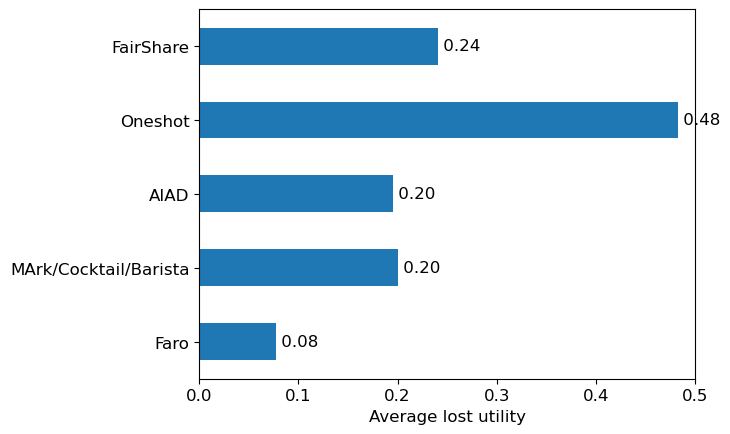

In [15]:
ax = (1 - real_avg_util_df.mean())[targets].plot.barh()
# ax = (1 - real_avg_util_df.mean()).plot.barh()
ax.set_xlabel("Average lost utility")

new_labels = []
for text in ax.get_yticklabels():
    splits = text.get_text().split("-")
    text.set_text(splits[0])
    new_labels.append(text)
ax.set_yticklabels(new_labels)

ax.invert_yaxis()
for bar in ax.containers:
    ax.bar_label(bar, fmt=" %.2f")
if num_cpus == 32:
    ax.set_xlim(None, 0.5)
# elif num_cpus == 36:
    # ax.set_xlim(None, 0.4)
elif num_cpus == 16:
    ax.set_xlim(None, 1.0)
ax.get_figure().savefig(f"images/{num_cpus}_avg_lost_utility_real.eps", bbox_inches='tight')

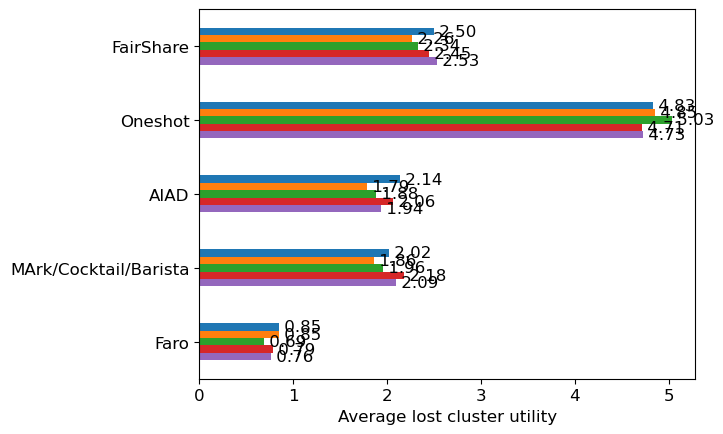

In [16]:
ax = lost_real_cluster_util_df[targets].transpose().plot.barh(legend=False)
# # ax = (1 - real_avg_util_df.mean()).plot.barh()
ax.set_xlabel("Average lost cluster utility")

new_labels = []
for text in ax.get_yticklabels():
    splits = text.get_text().split("-")
    text.set_text(splits[0])
    new_labels.append(text)
ax.set_yticklabels(new_labels)

ax.invert_yaxis()
for bar in ax.containers:
    ax.bar_label(bar, fmt=" %.2f")

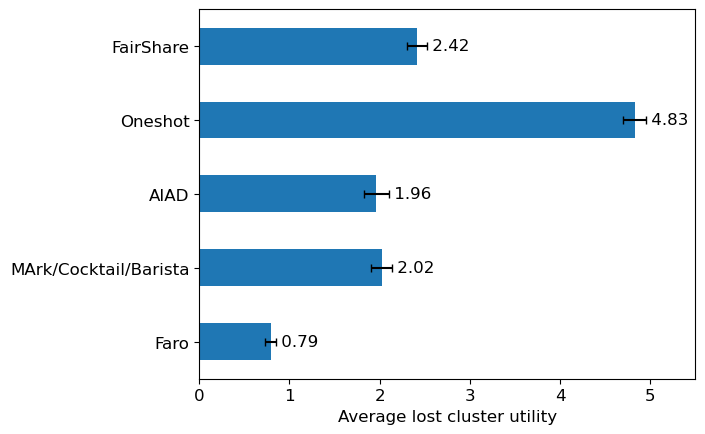

In [17]:
ax = lost_real_cluster_util_df[targets].mean(axis=0).plot.barh(xerr=lost_real_cluster_util_df[targets].std(axis=0), legend=False, capsize=3)
# # ax = (1 - real_avg_util_df.mean()).plot.barh()
ax.set_xlabel("Average lost cluster utility")

new_labels = []
for text in ax.get_yticklabels():
    splits = text.get_text().split("-")
    text.set_text(splits[0])
    new_labels.append(text)
ax.set_yticklabels(new_labels)

ax.invert_yaxis()
# for bar in ax.containers:
#     ax.bar_label(bar, fmt=" %.2f")
ax.bar_label(ax.containers[1], fmt=" %.2f")
if num_cpus == 32:
    ax.set_xlim(None, 5.5)
# elif num_cpus == 36:
#     ax.set_xlim(None, 0.4)
elif num_cpus == 16:
    ax.set_xlim(None, 10)
ax.get_figure().savefig(f"images/{num_cpus}_avg_lost_cluster_utility_real.eps", bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 640x480 with 0 Axes>

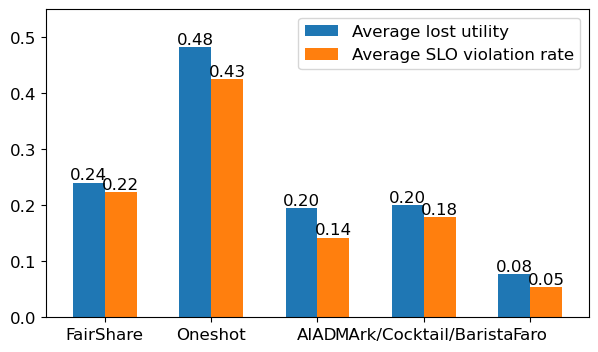

In [18]:
fig = plt.figure()
merged_df = merge((1-real_avg_util_df.mean()), (real_slo_rates_df).mean())
merged_df.rename(columns={"Cluster": "Average lost utility", "Simulation": "Average SLO violation rate"}, inplace=True)
ax = merged_df.loc[targets].plot.bar(figsize=figsize, width=0.6)
# plt.ylabel("Average lost utility / SLO violation rate")
plt.xticks(rotation=0)

new_labels = []
for text in ax.get_xticklabels():
    splits = text.get_text().split("-")
    text.set_text(splits[0])
    new_labels.append(text)
ax.set_xticklabels(new_labels)

# ax.invert_yaxis()
for bar in ax.containers:
    ax.bar_label(bar, fmt="%.2f")
if num_cpus in [32, 36]:
    ax.set_ylim(None, 0.55)
elif num_cpus == 16:
    ax.set_ylim(None, 1.0)
ax.get_figure().savefig(f"images/{num_cpus}_avg_lost_utility_slo_real.eps", bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


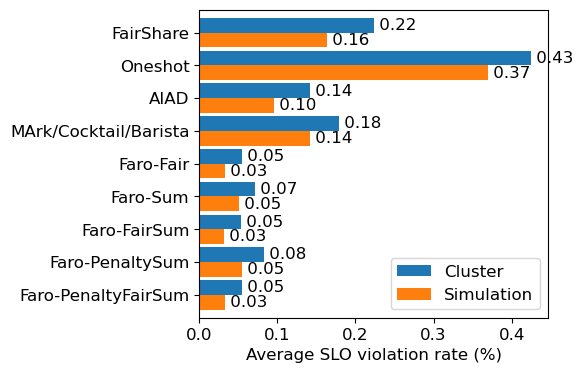

In [19]:
comparison_figsize=(4.5, 4)
comparison_width = 0.9

ax = merge(real_slo_rates_df.mean(), sim_slo_rates_df.mean()).plot.barh(width=comparison_width, figsize=comparison_figsize)
ax.invert_yaxis()
for bar in ax.containers:
    ax.bar_label(bar, fmt=" %.2f")
# ax.set_title(f"Average SLO violate rates (max replicas: {num_cpus})")
ax.set_xlabel("Average SLO violation rate (%)")
# if num_cpus == 32:
#     ax.set_xlim(None, 60)
# elif num_cpus == 36:
#     ax.set_xlim(None, 50)
if num_cpus == 16:
    ax.set_xlim(None, 1.1)
ax.get_figure().savefig(f"images/{num_cpus}_comparison_avg_slo_rate.eps", bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


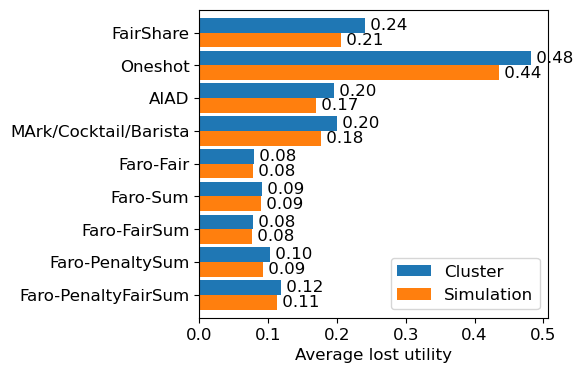

In [20]:
ax = merge((1-real_avg_util_df).mean(), (1-sim_avg_util_df).mean()).plot.barh(figsize=comparison_figsize, width=comparison_width)
ax.invert_yaxis()
for bar in ax.containers:
    ax.bar_label(bar, fmt=" %.2f")
# ax.set_title(f"Average utility (max replicas: {num_cpus})")
# if num_cpus == 32:
#     ax.set_xlim(None, 0.5)
# elif num_cpus == 36:
#     ax.set_xlim(None, 0.4)
if num_cpus == 16:
    ax.set_xlim(None, 1.3)
ax.set_xlabel("Average lost utility")
ax.get_figure().savefig(f"images/{num_cpus}_comparison_avg_lost_util.eps", bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


                       Cluster  Cluster
Faro-FairSum              0.79     0.07
Faro-Fair                 0.80     0.07
Faro-Sum                  0.92     0.04
Faro-PenaltySum           1.05     0.10
Faro-PenaltyFairSum       1.20     0.15
AIAD                      1.96     0.14
MArk/Cocktail/Barista     2.02     0.12
FairShare                 2.42     0.11
Oneshot                   4.83     0.13
                       Simulation  Simulation
Faro-FairSum                 0.78        0.01
Faro-Fair                    0.80        0.03
Faro-Sum                     0.91        0.03
Faro-PenaltySum              0.94        0.02
Faro-PenaltyFairSum          1.14        0.12
AIAD                         1.71        0.04
MArk/Cocktail/Barista        1.77        0.08
FairShare                    2.08        0.02
Oneshot                      4.37        0.16
kendall_tau_dist: 0.0


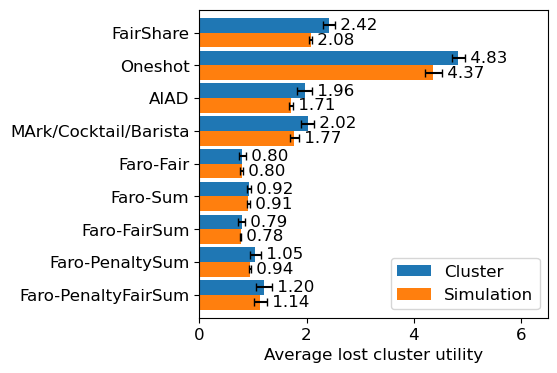

In [21]:
merged_df = merge(lost_real_cluster_util_df.mean(axis=0), (10 - sim_cluster_util_df).mean(axis=0))
merged_std_df = merge(lost_real_cluster_util_df.std(axis=0), (10 - sim_cluster_util_df).std(axis=0)).fillna(0)
ax = merged_df.plot.barh(figsize=comparison_figsize, width=comparison_width, xerr=merged_std_df, capsize=3)
ax.invert_yaxis()

import numpy as np

def normalised_kendall_tau_distance(values1, values2):
    """Compute the Kendall tau distance."""
    n = len(values1)
    assert len(values2) == n, "Both lists have to be of equal length"
    i, j = np.meshgrid(np.arange(n), np.arange(n))
    a = np.argsort(values1)
    b = np.argsort(values2)
    ndisordered = np.logical_or(np.logical_and(a[i] < a[j], b[i] > b[j]), np.logical_and(a[i] > a[j], b[i] < b[j])).sum()
    return ndisordered / (n * (n - 1))

merged_df = merged_df.round(2)
merged_std_df = merged_std_df.round(2)

print(pd.concat([merged_df['Cluster'].sort_values(), merged_std_df["Cluster"]], axis=1))
print(pd.concat([merged_df['Simulation'].sort_values(), merged_std_df["Simulation"]], axis=1))
print("kendall_tau_dist:", normalised_kendall_tau_distance(merged_df['Cluster'].values, merged_df['Simulation'].values))
if not (merged_df['Cluster'].sort_values().keys() == merged_df['Simulation'].sort_values().keys()).all():
    print(merged_df['Cluster'], merged_df['Simulation'])
    raise ValueError("the order are different")

for bar in ax.containers:
    if isinstance(bar, matplotlib.container.BarContainer):
        ax.bar_label(bar, fmt=" %.2f")
# ax.set_title(f"Average utility (max replicas: {num_cpus})")
ax.set_xlabel("Average lost cluster utility")
if num_cpus in [32, 36]:
    ax.set_xlim(None, 6.5)
elif num_cpus in [16]:
    ax.set_xlim(None, 11)

# ax.set_yticklabels(ax.get_yticklabels(), rotation=10)
if num_cpus == 16:
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, loc=2)
ax.get_figure().savefig(f"images/{num_cpus}_comparison_avg_lost_cluster_util.eps", bbox_inches='tight')

Text(0.5, 0, 'Average cluster SLO violations')

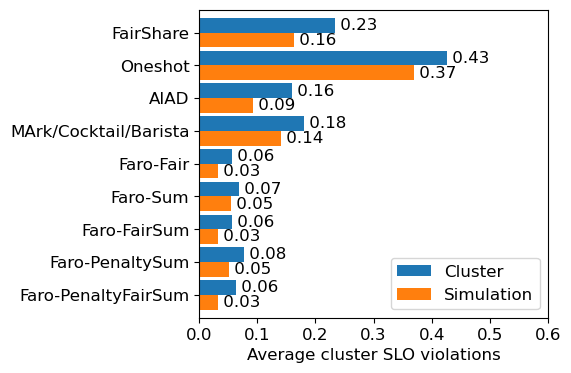

In [22]:
ax = merged_df = merge((1 - real_cluster_slo_df).transpose().iloc[:, 0], (1 - sim_cluster_slo_df).transpose().iloc[:, 0]).plot.barh(figsize=comparison_figsize, width=comparison_width)
ax.invert_yaxis()
for bar in ax.containers:
    ax.bar_label(bar, fmt=" %.2f")
# ax.set_title(f"Average utility (max replicas: {num_cpus})")
if num_cpus in [16]:
    ax.set_xlim(None, 1.1)
elif num_cpus in [32, 36]:
    ax.set_xlim(None, 0.6)
ax.set_xlabel("Average cluster SLO violations")
# ax.get_figure().savefig(f"images/{num_cpus}_comparison_avg_lost_cluster_slo.eps", bbox_inches='tight')

Text(0.5, 0, 'Average lost (effective) utility')

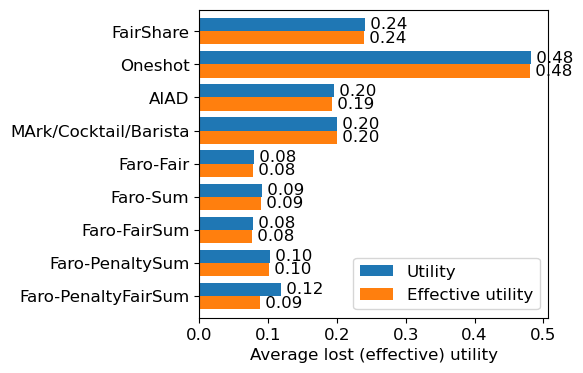

In [23]:
merged_df = merge((1-real_avg_util_df).mean(), (1-real_avg_effective_util_df).mean())
merged_df.rename(columns={"Cluster": "Utility", "Simulation": "Effective utility"}, inplace=True)
ax = merged_df.plot.barh(figsize=comparison_figsize, width=0.8)
ax.invert_yaxis()
for bar in ax.containers:
    ax.bar_label(bar, fmt=" %.2f")
# ax.set_title(f"Average utility (max replicas: {num_cpus})")
if num_cpus in [16]:
    ax.set_xlim(None, 1.1)
ax.set_xlabel("Average lost (effective) utility")
# ax.get_figure().savefig(f"images/{num_cpus}_comparison_avg_lost_util_and_effective_util.eps", bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


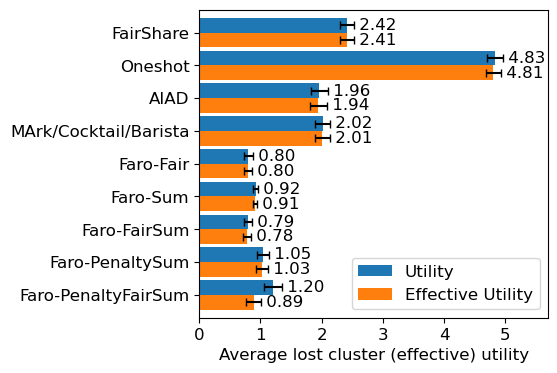

In [24]:
# merged_df = merge((10 - real_cluster_util_df).transpose().iloc[:, 0], (10 - real_cluster_effective_util_df).transpose().iloc[:, 0])
merged_df = merge((10 - real_cluster_util_df).mean(axis=0), (10 - real_cluster_effective_util_df).mean(axis=0))
merged_df.rename(columns={"Cluster": "Utility", "Simulation": "Effective Utility"}, inplace=True)
merged_std_df = merge((10 - real_cluster_util_df).std(axis=0), (10 - real_cluster_effective_util_df).std(axis=0))
merged_std_df.rename(columns={"Cluster": "Utility", "Simulation": "Effective Utility"}, inplace=True)
ax = merged_df.plot.barh(figsize=comparison_figsize, width=comparison_width, xerr=merged_std_df, capsize=3)
ax.invert_yaxis()
for bar in ax.containers:
    if isinstance(bar, matplotlib.container.BarContainer):
        ax.bar_label(bar, fmt=" %.2f")
# ax.set_title(f"Average utility (max replicas: {num_cpus})")
if num_cpus == 32:
    ax.set_xlim(None, 5.7)
elif num_cpus == 36:
    ax.set_xlim(None, 5.5)
elif num_cpus == 16:
    ax.set_xlim(None, 11.5)
ax.set_xlabel("Average lost cluster (effective) utility")

if num_cpus == 16:
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, loc=2)

ax.get_figure().savefig(f"images/{num_cpus}_comparison_cluster_lost_util_and_effective_util.eps", bbox_inches='tight')

Text(0.5, 0, 'Average utility')

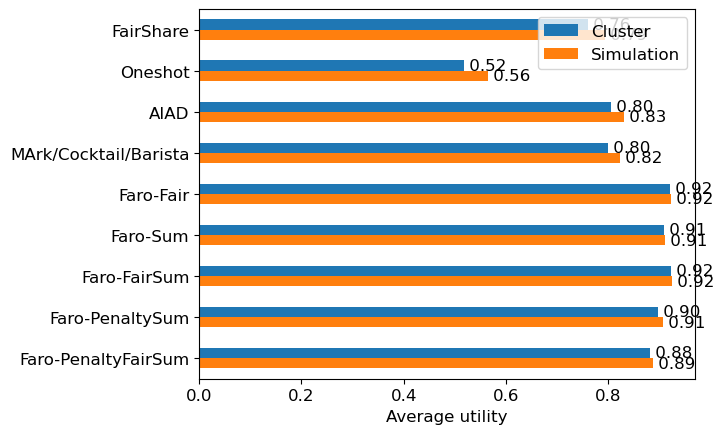

In [25]:
ax = merge(real_avg_util_df.mean(), sim_avg_util_df.mean()).plot.barh()
ax.invert_yaxis()
for bar in ax.containers:
    ax.bar_label(bar, fmt=" %.2f")
# ax.set_title(f"Average utility (max replicas: {num_cpus})")
ax.set_xlabel("Average utility")
# ax.get_figure().savefig(f"images/{num_cpus}_comparison_avg_util.eps", bbox_inches='tight')

Text(0.5, 0, 'Average effective utility')

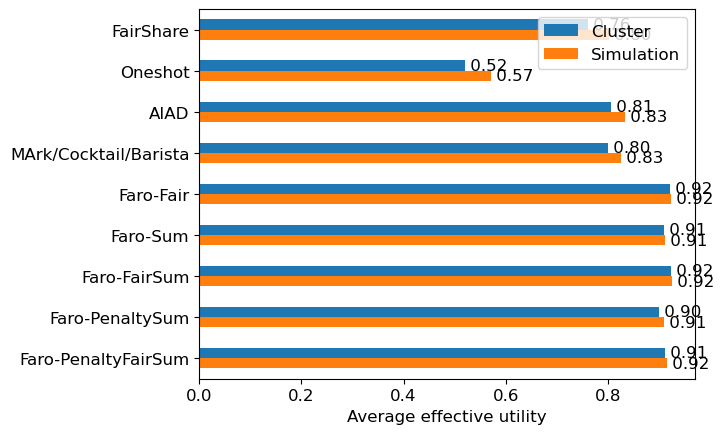

In [26]:
ax = merge(real_avg_effective_util_df.mean(), sim_avg_effective_util_df.mean()).plot.barh()
ax.invert_yaxis()
for bar in ax.containers:
    ax.bar_label(bar, fmt=" %.2f")
# ax.set_title(f"Average effective utility (max replicas: {num_cpus})")
ax.set_xlabel("Average effective utility")
# ax.get_figure().savefig(f"images/{num_cpus}_comparison_avg_effective_util.eps", bbox_inches='tight')

Text(0.5, 0, 'Average lost effective utility')

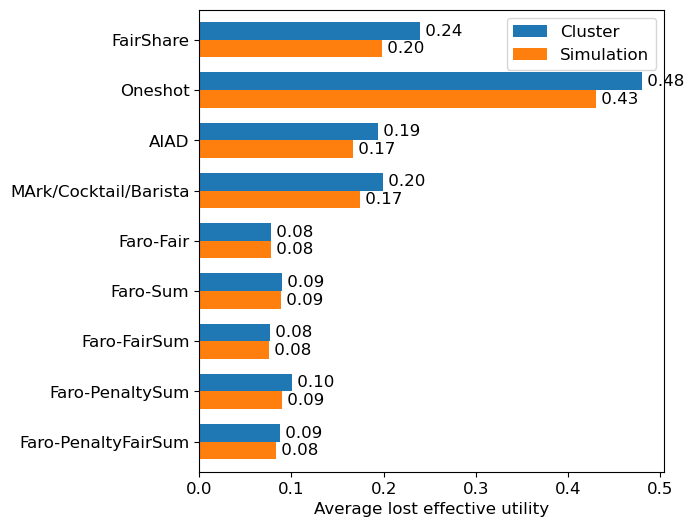

In [27]:
ax = merge((1-real_avg_effective_util_df).mean(), (1-sim_avg_effective_util_df).mean()).plot.barh(figsize=(6, 6), width=0.7)
ax.invert_yaxis()
# ax.set_title(f"Average effective utility (max replicas: {num_cpus})")
for bar in ax.containers:
    ax.bar_label(bar, fmt=" %.2f")
# if num_cpus == 32:
#     ax.set_xlim(None, 0.5)
# elif num_cpus == 36:
#     ax.set_xlim(None, 0.4)
if num_cpus == 16:
    ax.set_xlim(None, 1.15)
ax.set_xlabel("Average lost effective utility")
# ax.get_figure().savefig(f"images/{num_cpus}_comparison_avg_lost_effective_util.eps", bbox_inches='tight')

In [28]:
new_df = sim_df.astype({'num_cpus': "int32"})[
    sim_df.policy.isin(sim_policies) & 
    (sim_df.model_config != "model_10")
][["num_cpus", "policy", "avg_total_slo_rate", "avg_total_utility", "avg_total_effective_utility"]]

In [29]:
new_df = new_df.groupby(["num_cpus", "policy"]).mean().reset_index()

In [30]:
new_df["avg_slo_violation"] = 1 - new_df.avg_total_slo_rate
new_df["avg_lost_total_utility"] = 10 - new_df.avg_total_utility

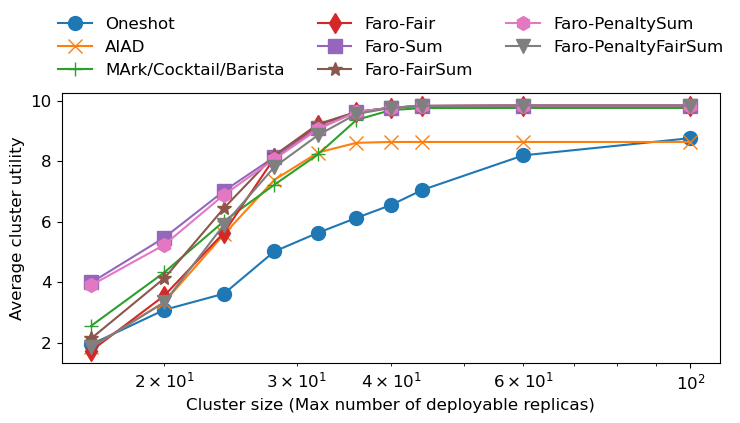

In [31]:
# fig, ax = plt.subplots(figsize=(9, 6))
fig, ax = plt.subplots(figsize=(8.5, 3.5))
markers = ["o", "x", "+", "d", "s", "*", "h", "v"]
for i, policy in enumerate([policy for policy in sim_policies if policy != "fairshare"]):
# markers = ["o", "x", "+", "d", "s", "*", "h", "v", "^"]
# for i, policy in enumerate([policy for policy in sim_policies]):
    label = sim_labels[policy]
    new_df[new_df["policy"] == policy].sort_values("num_cpus").plot(
        x="num_cpus", 
        y="avg_total_utility",
        # y="avg_lost_total_utility", 
        # y="avg_slo_violation", 
        # y="avg_total_slo_rate", 
        label=label, ax=ax, marker=markers[i], markersize=10)
# plt.xlabel("Cluster size (Max number of deployable replicas, Log scale)")
plt.xlabel("Cluster size (Max number of deployable replicas)")
plt.xscale("log")
# plt.yscale("log")
# plt.ylabel("Average SLO satisfaction rate")
# plt.ylabel("Average lost cluster utility")
plt.ylabel("Average cluster utility")
plt.legend(bbox_to_anchor=(0.5, 1), loc='lower center', ncol=3, frameon=False)
# plt.legend(bbox_to_anchor=(1, 0.5), loc='center left')
fig.savefig("images/pareto_curve_sim.eps", bbox_inches="tight")

In [32]:
util_df_32, slo_df_32, _, _, _, _ = get_stat_dfs(real_df[real_df.num_cpus == "32"], real_policies, real_labels, model_labels)
util_df_36, slo_df_36, _, _, _, _ = get_stat_dfs(real_df[real_df.num_cpus == "36"], real_policies, real_labels, model_labels)

lost_util_df_32 = 10 - util_df_32.mean(axis=0)
lost_util_df_36 = 10 - util_df_36.mean(axis=0)
lost_util_df_32 / lost_util_df_36 - 1

cluster_utils
FairShare 5
Oneshot 5
AIAD 5
MArk/Cocktail/Barista 5
Faro-Fair 5
Faro-Sum 5
Faro-FairSum 5
Faro-PenaltySum 5
Faro-PenaltyFairSum 5
cluster_effective_utils
FairShare 5
Oneshot 5
AIAD 5
MArk/Cocktail/Barista 5
Faro-Fair 5
Faro-Sum 5
Faro-FairSum 5
Faro-PenaltySum 5
Faro-PenaltyFairSum 5
cluster_slo
FairShare 5
Oneshot 5
AIAD 5
MArk/Cocktail/Barista 5
Faro-Fair 5
Faro-Sum 5
Faro-FairSum 5
Faro-PenaltySum 5
Faro-PenaltyFairSum 5
avg_utils
FairShare 10
Oneshot 10
AIAD 10
MArk/Cocktail/Barista 10
Faro-Fair 10
Faro-Sum 10
Faro-FairSum 10
Faro-PenaltySum 10
Faro-PenaltyFairSum 10
slo_rates
FairShare 10
Oneshot 10
AIAD 10
MArk/Cocktail/Barista 10
Faro-Fair 10
Faro-Sum 10
Faro-FairSum 10
Faro-PenaltySum 10
Faro-PenaltyFairSum 10
avg_effective_utils
FairShare 10
Oneshot 10
AIAD 10
MArk/Cocktail/Barista 10
Faro-Fair 10
Faro-Sum 10
Faro-FairSum 10
Faro-PenaltySum 10
Faro-PenaltyFairSum 10
cluster_utils
FairShare 5
Oneshot 5
AIAD 5
MArk/Cocktail/Barista 5
Faro-Fair 5
Faro-Sum 5
Faro-Fa

FairShare                0.000000
Oneshot                  0.113818
AIAD                     0.356120
MArk/Cocktail/Barista    1.486500
Faro-Fair                0.923883
Faro-Sum                 0.981344
Faro-FairSum             0.657138
Faro-PenaltySum          1.378313
Faro-PenaltyFairSum      1.456862
dtype: float64

In [33]:
# calculate errors between simulation and real data
real_df_dict = {}
sim_df_dict = {}
for num_cpu in [16, 32, 36]:
    real_df_dict[num_cpu] = get_stat_dfs(real_df[real_df.num_cpus == str(num_cpu)], real_policies, real_labels, model_labels)[0].mean(axis=0)
    sim_df_dict[num_cpu] = get_stat_dfs(sim_df[sim_df.num_cpus == str(num_cpu)], sim_policies, sim_labels, model_labels)[0].mean(axis=0)

cluster_utils
FairShare 5
Oneshot 5
AIAD 5
MArk/Cocktail/Barista 5
Faro-Fair 5
Faro-Sum 5
Faro-FairSum 5
Faro-PenaltySum 5
Faro-PenaltyFairSum 5
cluster_effective_utils
FairShare 5
Oneshot 5
AIAD 5
MArk/Cocktail/Barista 5
Faro-Fair 5
Faro-Sum 5
Faro-FairSum 5
Faro-PenaltySum 5
Faro-PenaltyFairSum 5
cluster_slo
FairShare 5
Oneshot 5
AIAD 5
MArk/Cocktail/Barista 5
Faro-Fair 5
Faro-Sum 5
Faro-FairSum 5
Faro-PenaltySum 5
Faro-PenaltyFairSum 5
avg_utils
FairShare 10
Oneshot 10
AIAD 10
MArk/Cocktail/Barista 10
Faro-Fair 10
Faro-Sum 10
Faro-FairSum 10
Faro-PenaltySum 10
Faro-PenaltyFairSum 10
slo_rates
FairShare 10
Oneshot 10
AIAD 10
MArk/Cocktail/Barista 10
Faro-Fair 10
Faro-Sum 10
Faro-FairSum 10
Faro-PenaltySum 10
Faro-PenaltyFairSum 10
avg_effective_utils
FairShare 10
Oneshot 10
AIAD 10
MArk/Cocktail/Barista 10
Faro-Fair 10
Faro-Sum 10
Faro-FairSum 10
Faro-PenaltySum 10
Faro-PenaltyFairSum 10
cluster_utils
FairShare 5
Oneshot 5
AIAD 5
MArk/Cocktail/Barista  model_9 5
Faro-Fair  model_9 5


In [34]:
import numpy as np

mean_real = pd.concat([real_df_dict[16], real_df_dict[32], real_df_dict[36]], axis=1)
mean_sim = pd.concat([sim_df_dict[16], sim_df_dict[32], sim_df_dict[36]], axis=1)
mean_sim.rename(index={v: v.split(" ")[0] for v in list(mean_sim.index)}, inplace=True)

errs = (mean_real - mean_sim).abs() / (10 - mean_real)
print(f"mean: {np.nanmean(errs) * 100:.2f}%, max: {np.nanmax(errs) * 100:.2f}%, min: {np.nanmin(errs) * 100:.2f}%")

mean: 9.60%, max: 22.76%, min: 0.77%
